# 인공지능 프로젝트 - 태양 활동 예측하기 EDA

### 1. f10.7(태양 활동 데이터) 10.7cm 파장 flux 데이터

In [2]:
# library import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from PIL import Image
import cv2
import os
import tensorflow as tf

In [297]:
# data load
with open('./data/f10-7.pkl', 'rb') as f:
    flux = pickle.load(f)

In [4]:
flux.head()

,Date,value
44,19470305,306.10
45,19470306,306.00
46,19470307,321.40
47,19470308,345.60
48,19470309,335.75


In [5]:
# data 시간 범위 확인
flux.iloc[0, 0], flux.iloc[-1, 0]

(19470305, 20180430)

In [281]:
flux.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25989 entries, 44 to 26032
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    25989 non-null  int64  
 1   value   25989 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 406.2 KB


In [282]:
flux.describe()

,Date,value
count,2.598900e+04,25989.000000
mean,1.982317e+07,125.424482
std,2.054284e+05,53.492855
min,1.947030e+07,61.600000
25%,1.964122e+07,79.200000
50%,1.982100e+07,110.100000
75%,2.000072e+07,159.100000
max,2.018043e+07,457.900000


#### 1-1. EDA 질문 1: F10.7 flux 데이터의 대략적인 주기는 얼마일까?

<AxesSubplot:>

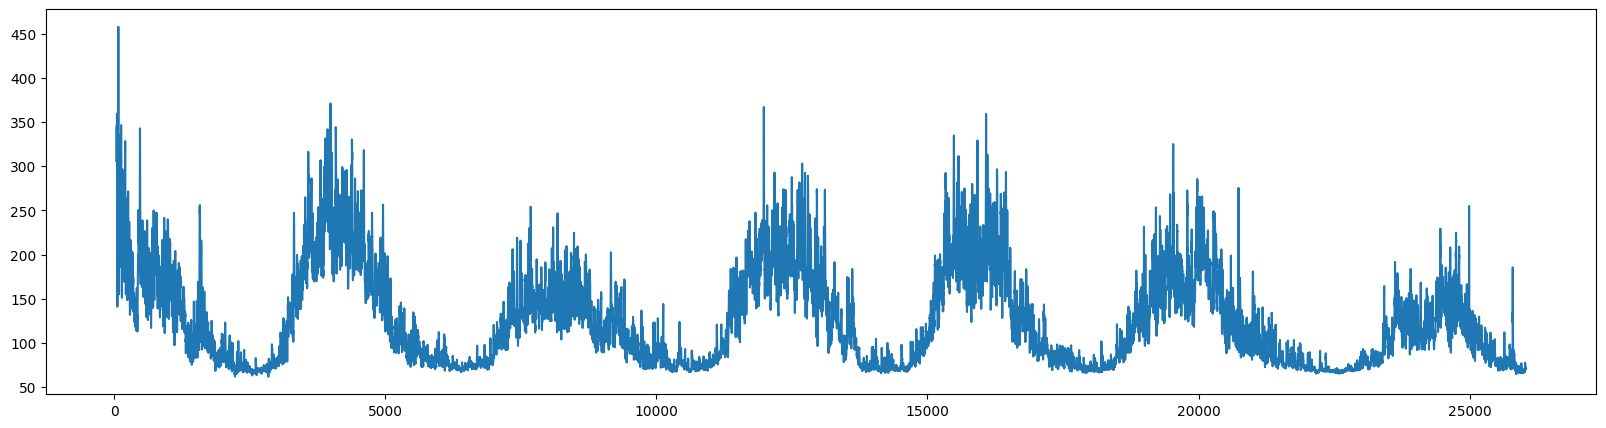

In [6]:
# data 시각화
flux['value'].plot(figsize=(20, 5))

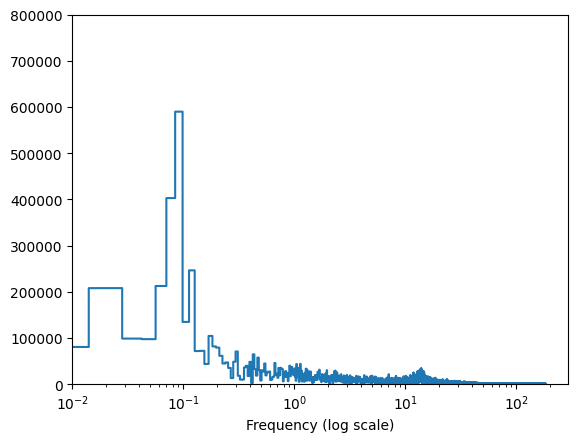

In [65]:
# FFT를 이용한 주파수 분석
fft = tf.signal.rfft(flux['value'])
f_per_dataset = np.arange(0, len(fft))
years_per_dataset = len(flux)/(365.2524)
f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 800000)
plt.xlim(0.01, max(plt.xlim()))
_ = plt.xlabel('Frequency (log scale)')

In [72]:
# 가장 큰 주파수를 가진 데이터의 index
np.argmax(np.abs(fft)[1:])

6

In [74]:
# 가장 큰 피크 나타내는 주기(단위: year)
1/f_per_year[7]

10.164790938305362

약 10.16년의 주기를 가지고 있음을 알 수 있다.

In [82]:
# 그래프 오른쪽에서 나타나는 피크의 index
np.argmax(np.abs(fft)[100:])

887

In [84]:
# 피크 나타나는 주기(단위: day)
1/f_per_year[987]*365.2524

26.331306990881462

작은 단위에서는 약 26.33일의 주기를 가지고 있다.

태양의 지구에 대한 상대 자전 주기가 태양의 적도에서는 25.05일, 태양의 극지방에서는 34.4일인 것으로 보아 태양 상대 자전 주기와 비슷한 값임을 알 수 있다.

태양에서도 지점마다 온도나 플레어, 코로나 발생 등이 다르므로 태양의 어떤 면이 지구를 향하고 있는지가 단기적 예측에 주요할 것임을 알 수 있다.

### 2. 태양 자기장 세기 데이터

In [86]:
with open('./data/mag.pkl', 'rb') as f:
    mag = pickle.load(f)

In [286]:
mag.head(), mag.tail()

(       Date  Magnitude
 0  20100901   7.345958
 1  20100902   6.303958
 2  20100903   3.235500
 3  20100904   2.347417
 4  20100905   3.981583,
           Date  Magnitude
 4732  20230816   6.469583
 4733  20230817   7.591792
 4734  20230818   9.496291
 4735  20230819   5.143250
 4736  20230820   7.518667)

In [284]:
mag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4737 entries, 0 to 4736
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4725 non-null   object 
 1   Magnitude  4737 non-null   float32
dtypes: float32(1), object(1)
memory usage: 55.6+ KB


In [285]:
mag.describe()

,Magnitude
count,4737.000000
mean,5.496147
std,2.228953
min,1.633375
25%,3.978167
50%,5.003125
75%,6.435791
max,25.431000


#### 2-1. EDA 질문 2: 자기장 데이터는 주기성을 띌까? 대략적인 주기는 얼마일까?

<AxesSubplot:>

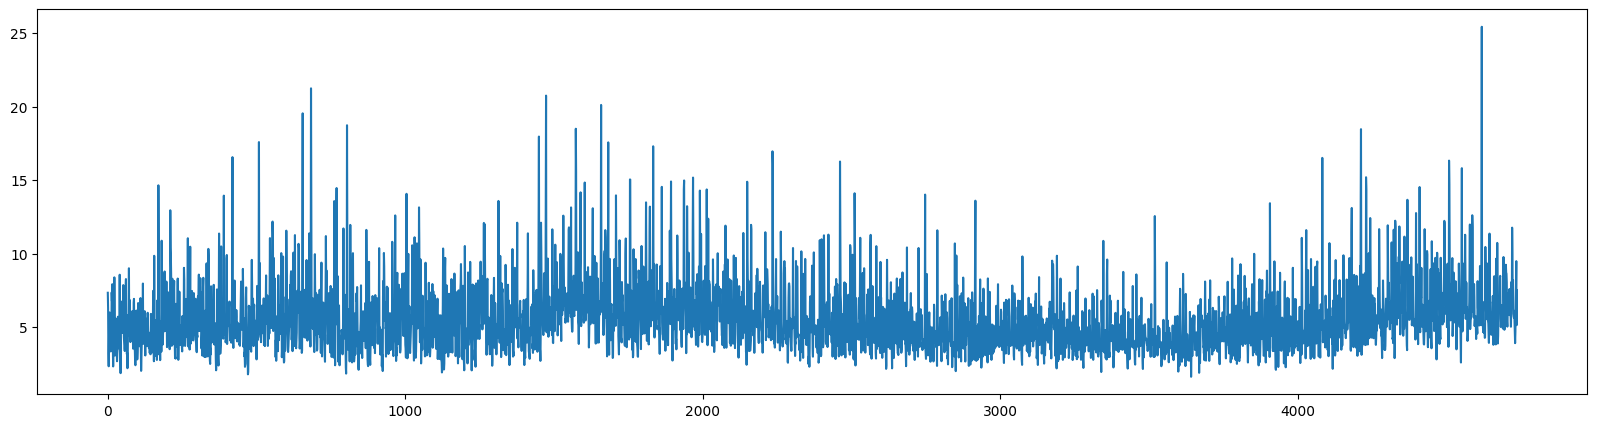

In [88]:
# data 시각화
mag['Magnitude'].plot(figsize=(20, 5))

<AxesSubplot:>

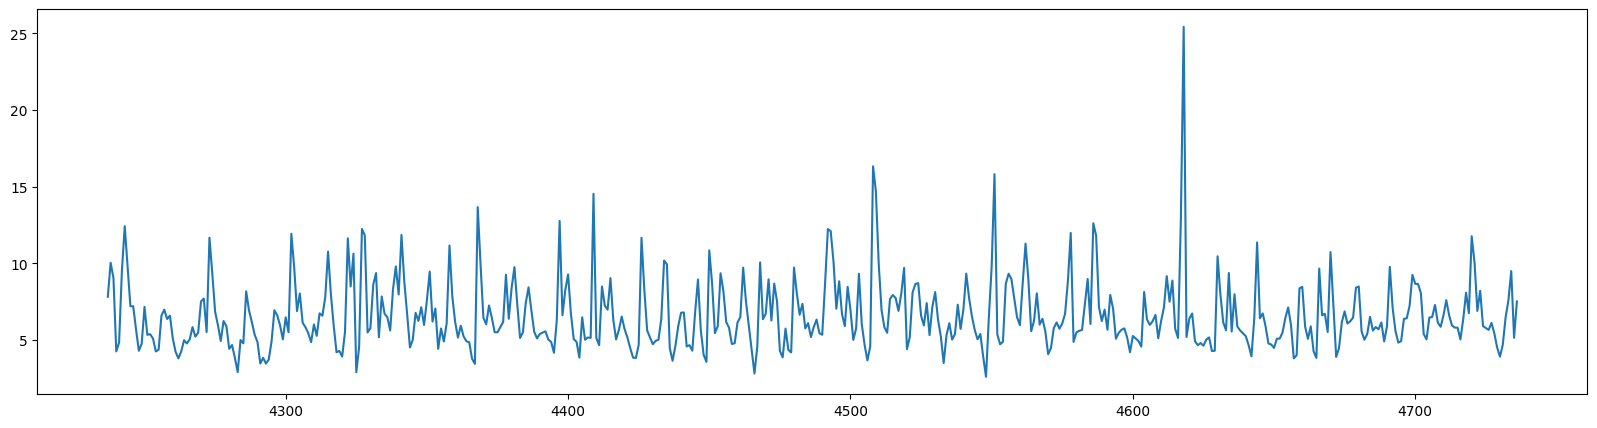

In [89]:
# 노이즈가 너무 심하므로, 작은 범위에서 관찰해보자
mag['Magnitude'][-500:].plot(figsize=(20, 5))

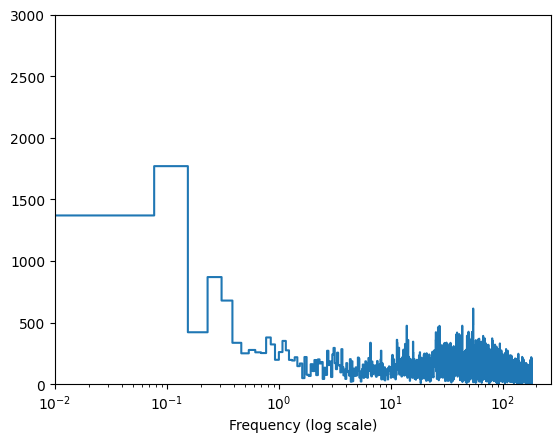

In [106]:
# FFT를 이용한 주파수 분석
fft2 = tf.signal.rfft(mag['Magnitude'])
f_per_dataset2 = np.arange(0, len(fft2))
years_per_dataset2 = len(mag)/(365.2524)
f_per_year2 = f_per_dataset2/years_per_dataset2
plt.step(f_per_year2, np.abs(fft2))
plt.xscale('log')
plt.ylim(0, 3000)
plt.xlim(0.01, max(plt.xlim()))
_ = plt.xlabel('Frequency (log scale)')

In [108]:
# 앞쪽의 피크는 scale 상 유효하지 않아 보인다. 뒤쪽의 피크 관찰
np.argmax(np.abs(fft)[100:])

608

In [109]:
# 뒤쪽 피크 나타나는 주기(단위: day)
1/f_per_year2[708]*365.2524

6.690677966101695

자기장 세기는 약 6.69일 정도에서 가장 큰 주기성을 보였다. 기간이 짧아서 의미가 있다고 하기에는 부족하다.

In [275]:
# 노이즈가 너무 커서 100개씩 평균을 내보았다
n = 100
smooth_mag = [mag['Magnitude'][i:i+n].mean() for i in range(0, len(mag['Magnitude'])-n)]

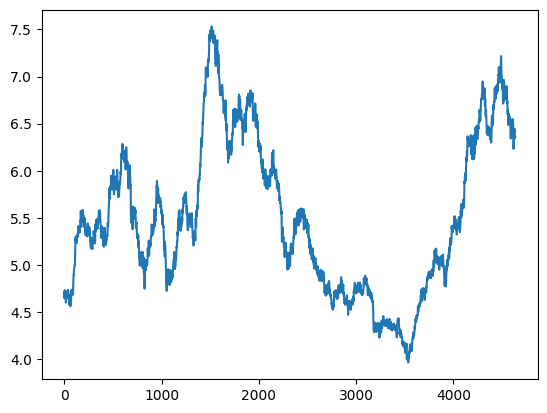

In [276]:
# smoothed 의 시각화
plt.plot(smooth_mag)

자기장의 변화를 훨씬 직관적으로 볼 수 있다.

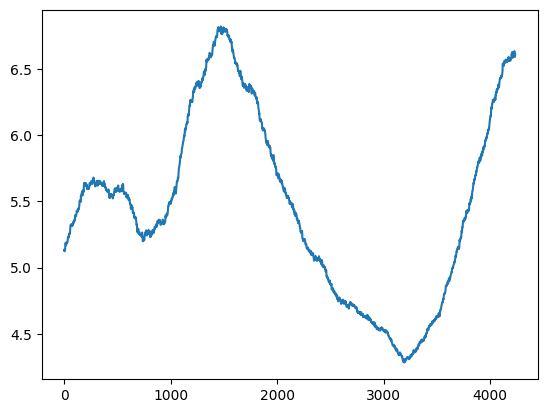

In [277]:
# 500개씩 평균 냈을 때 시각화
n = 500
smooth_mag_ = [mag['Magnitude'][i:i+n].mean() for i in range(0, len(mag['Magnitude'])-n)]
plt.plot(smooth_mag_)

### 3. 태양풍 데이터

In [344]:
with open('./data/sw.pkl', 'rb') as f:
    solar_wind = pickle.load(f)

<AxesSubplot:>

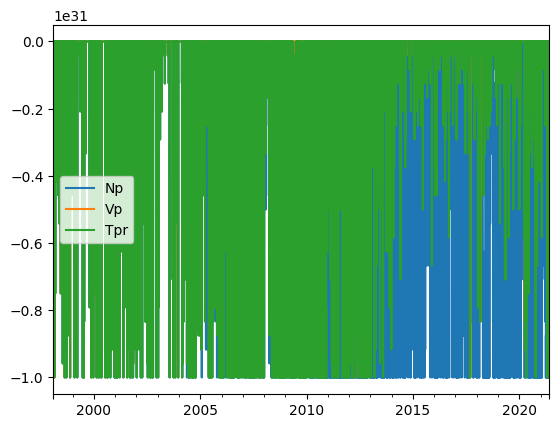

In [345]:
solar_wind.plot()

In [348]:
sw_normal = solar_wind[(solar_wind['Vp']>-100)&(solar_wind['Np']>-100)&(solar_wind['Tpr']>-100)]

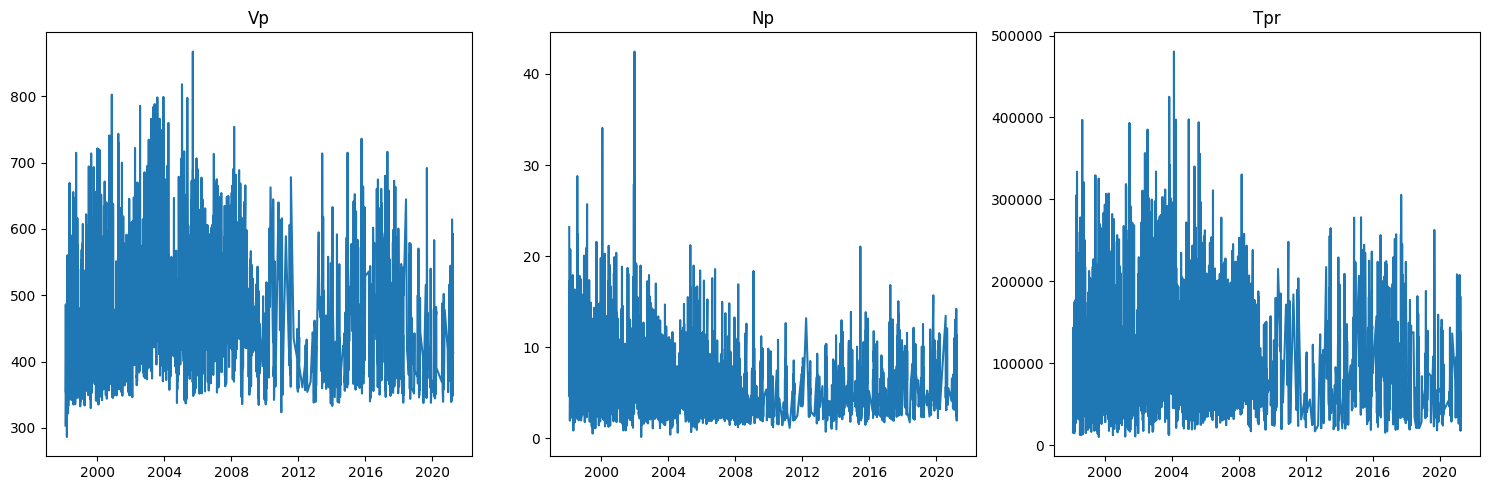

In [349]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

axs[1].plot(sw_normal['Np'])
axs[1].set_title('Np')

axs[0].plot(sw_normal['Vp'])
axs[0].set_title('Vp')

axs[2].plot(sw_normal['Tpr'])
axs[2].set_title('Tpr')

plt.tight_layout()
plt.show()

In [359]:
def smth(x):
    return [x[i:i+100].mean() for i in range(len(sw_normal)-100)]

smooth_sw = pd.DataFrame()
for i in sw_normal.columns:
    smooth_sw[i] = smth(sw_normal[i])

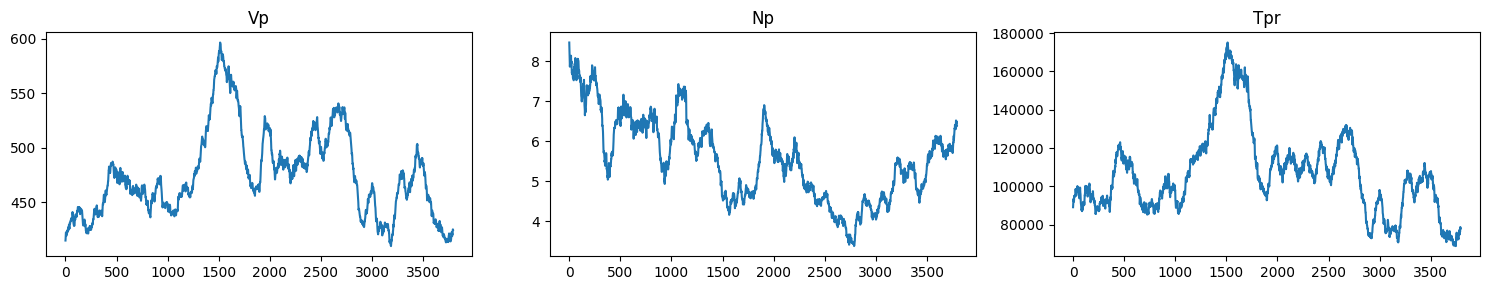

In [362]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 3))

axs[1].plot(smooth_sw['Np'])
axs[1].set_title('Np')

axs[0].plot(smooth_sw['Vp'])
axs[0].set_title('Vp')

axs[2].plot(smooth_sw['Tpr'])
axs[2].set_title('Tpr')

plt.tight_layout()
plt.show()

In [365]:
# FFT를 이용한 주파수 분석
def fft_plot(data, M):
    temp_fft = tf.signal.rfft(data)
    temp_f_per_dataset = np.arange(0, len(temp_fft))
    temp_years_per_dataset = len(data)/(365.2524)
    temp_f_per_year = temp_f_per_dataset/temp_years_per_dataset
    plt.step(temp_f_per_year, np.abs(temp_fft))
    plt.xscale('log')
    plt.ylim(0, M)
    plt.xlim(0.01, max(plt.xlim()))
    _ = plt.xlabel('Frequency (log scale)')

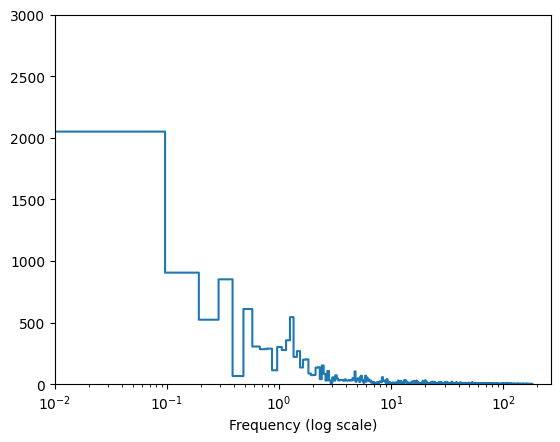

In [372]:
fft_plot(smooth_sw['Np'], 3000)

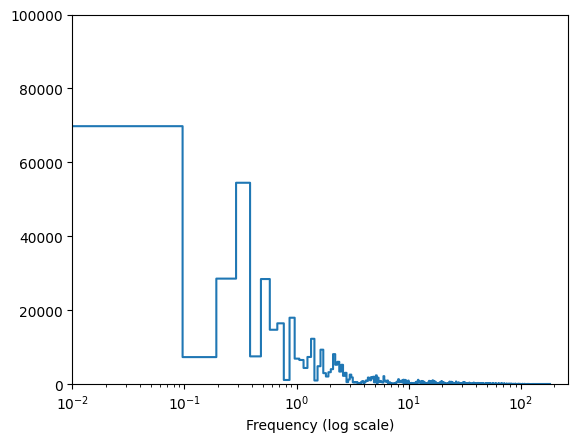

In [375]:
fft_plot(smooth_sw['Vp'], 100000)

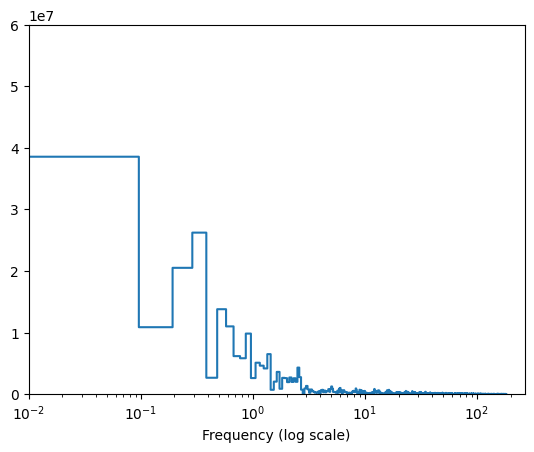

In [381]:
fft_plot(smooth_sw['Tpr'], 60000000)

### 4. 태양 흑점 수 데이터

In [101]:
with open('./data/ssn.pkl', 'rb') as f:
    ssn = pickle.load(f)

In [289]:
ssn.head(), ssn.tail()

(               Obsdate  swpc_ssn
 1  1996-08-18T00:00:00        14
 2  1996-08-19T00:00:00         0
 3  1996-08-20T00:00:00         0
 4  1996-08-21T00:00:00        12
 5  1996-08-22T00:00:00        12,
                   Obsdate  swpc_ssn
 8802  2023-11-04T00:00:00        95
 8803  2023-11-05T00:00:00        81
 8804  2023-11-06T00:00:00        67
 8805  2023-11-07T00:00:00        74
 8806  2023-11-08T00:00:00        92)

In [287]:
ssn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8806 entries, 1 to 8806
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Obsdate   8806 non-null   object
 1   swpc_ssn  8806 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 137.7+ KB


In [288]:
ssn.describe()

,swpc_ssn
count,8806.000000
mean,75.293096
std,63.613554
min,0.000000
25%,23.000000
50%,60.000000
75%,114.000000
max,401.000000


#### 4-1. EDA 질문 3: 태양 흑점 수 데이터의 대략적인 주기는 얼마일까?

<AxesSubplot:>

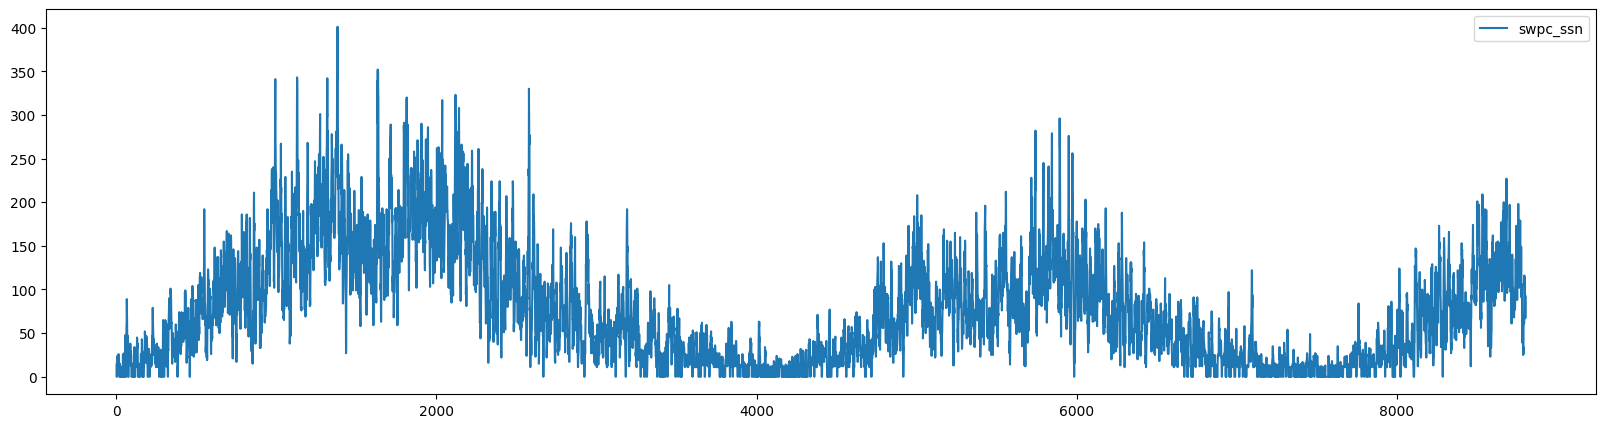

In [103]:
# data 시각화
ssn.plot(figsize=(20, 5))

<AxesSubplot:>

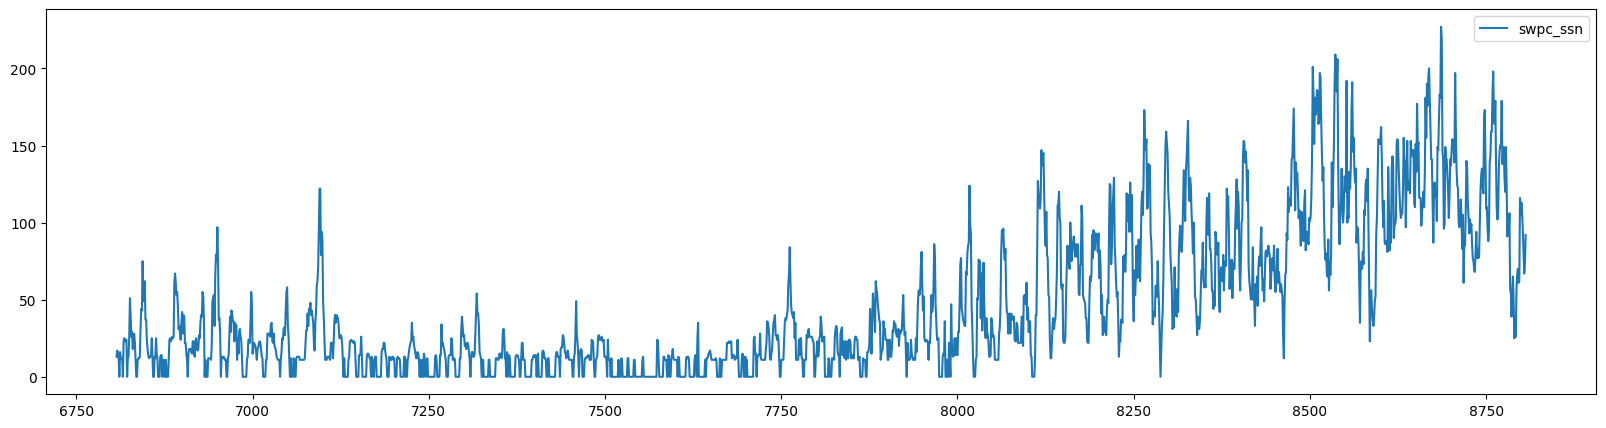

In [280]:
ssn[-2000:].plot(figsize=(20, 5))

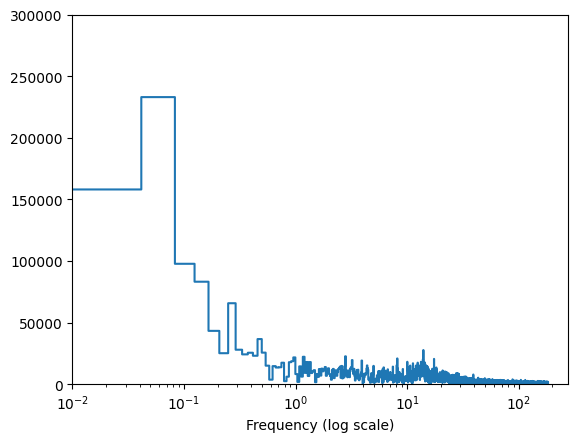

In [117]:
# FFT를 이용한 주파수 분석
fft3 = tf.signal.rfft(ssn['swpc_ssn'])
f_per_dataset3 = np.arange(0, len(fft3))
years_per_dataset3 = len(ssn)/(365.2524)
f_per_year3 = f_per_dataset3/years_per_dataset3
plt.step(f_per_year3, np.abs(fft3))
plt.xscale('log')
plt.ylim(0, 300000)
plt.xlim(0.01, max(plt.xlim()))
_ = plt.xlabel('Frequency (log scale)')

In [118]:
# 첫번쨰 피크의 index
np.argmax(np.abs(fft3)[1:])

1

In [119]:
# 첫번째 피크 나타나는 주기(단위: year)
1/f_per_year3[2]

12.054677806360752

In [121]:
# 뒤쪽 부분의 피크 index
np.argmax(np.abs(fft3)[100:])

237

In [122]:
# 뒤쪽 부분 피크 나타나는 주기(단위: day)
1/f_per_year3[337]*365.2524

26.130563798219587

위의 f10.7 flux 데이터와 비슷하다. 흑점 수 데이터에서 가장 큰 피크는 주기 12.05년으로, 작은 단위에서 가장 큰 피크는 26.13일로 나타났다. 대체로 f10.7 flux 데이터와 비슷한 것을 볼 수 있지만, 큰 주기 단위에서 값이 차이가 나는 것은 fft 탐색 간격이 큰 주기에서 크기 때문에 오차가 있는 것으로 보인다.

### 5. 이미지 데이터

In [184]:
# 193 angstrom 이미지 데이터 location list 만들기
img_loc_193 = ['./img_193/' + i for i in os.listdir('img_193') if i.endswith('.jpg')]
img_loc_304 = ['./img_304/' + i for i in os.listdir('img_304') if i.endswith('.jpg')]

In [186]:
img_loc_193[:5], img_loc_304[:5]

(['./img_193/2010_09_01.jpg',
  './img_193/2010_09_02.jpg',
  './img_193/2010_09_03.jpg',
  './img_193/2010_09_04.jpg',
  './img_193/2010_09_05.jpg'],
 ['./img_304/2010_09_01.jpg',
  './img_304/2010_09_02.jpg',
  './img_304/2010_09_03.jpg',
  './img_304/2010_09_04.jpg',
  './img_304/2010_09_05.jpg'])

In [179]:
date_list = pd.date_range(start='2010-09-01', end='2023-11-08', freq='D').map(lambda x: x.strftime('%Y_%m_%d'))
date_list[:5]

Index(['2010_09_01', '2010_09_02', '2010_09_03', '2010_09_04', '2010_09_05'], dtype='object')

In [187]:
img_name_193 = [i.split('/')[-1].split('.')[0] for i in img_loc_193]
img_name_304 = [i.split('/')[-1].split('.')[0] for i in img_loc_304]
img_name_193[:5], img_name_304[:5]

(['2010_09_01', '2010_09_02', '2010_09_03', '2010_09_04', '2010_09_05'],
 ['2010_09_01', '2010_09_02', '2010_09_03', '2010_09_04', '2010_09_05'])

In [215]:
# 이미지 데이터 자체가 없는 결측치 확인

print('img 193 결측치')
img_193_none = []
for i in date_list:
    if i not in img_name_193:
        img_193_none.append(0)
        print(i)
    else:
        img_193_none.append(1)

print('img 304 결측치')
img_304_none = []
for i in date_list:
    if i not in img_name_304:
        img_304_none.append(0)
        print(i)
    else:
        img_304_none.append(1)

img 193 결측치
2013_08_03
2015_09_12
2016_08_03
2016_08_04
2016_08_05
2016_08_06
2016_08_07
2016_08_08
2016_08_09
2022_10_25
img 304 결측치
2011_10_05
2015_04_28
2016_08_03
2016_08_04
2016_08_05
2016_08_06
2016_08_07
2016_08_08
2016_08_09
2017_02_16
2017_09_16
2018_11_06
2021_03_29
2023_08_07
2023_08_19


In [171]:
# 이미지 로드해보기, 흑백 데이터이므로 2차원 데이터로 로드한다.

from keras.utils import load_img, img_to_array

def load_image(img_loc):
    img_ = load_img(img_loc, target_size=(512, 512))
    img = img_to_array(img_)[:, :, 0]
    print(img.shape, img[250])
    plt.imshow(img_)

(512, 512) [  4.  17.  20.  15.  23.  22.  30.  33.  35.  40.  37.  49.  53.  56.
  61.  59.  63.  66.  68.  70.  71.  74.  73.  79.  79.  80.  87.  83.
  93.  94.  98. 105. 106. 113. 117. 122. 125. 125. 126. 127. 132. 135.
 138. 143. 147. 152. 156. 161. 166. 172. 179. 186. 192. 199. 204. 211.
 216. 186. 178. 173. 171. 171. 151. 149. 151. 147. 143. 143. 146. 146.
 142. 143. 143. 144. 140. 137. 130. 125. 120. 120. 123. 126. 125. 122.
 115. 114. 113. 106. 113. 102.  97.  89.  90.  86.  83.  86.  93.  82.
  89.  89.  95. 100.  97.  89.  87. 106. 111. 107. 110. 106.  85.  77.
  81.  75.  68.  70.  73.  74.  79.  76.  67.  67.  68.  74.  84.  75.
  74.  66.  69.  69.  73.  76.  77.  82.  88.  90.  95.  99. 103. 108.
 109. 116. 113. 108. 106. 106. 107.  85.  82.  77. 103.  96. 103. 116.
  51.  28.  25.  11.  10.  11.   8.   0.   3.   5.   0.   0.   0.   0.
   2.   1.   1.   1.   1.   1.   3.   2.   3.   1.   8.   2.   3.   6.
  52.  30.   7.  12.   9.  13.  13.   7.   7.  10.   7.   3.   2. 

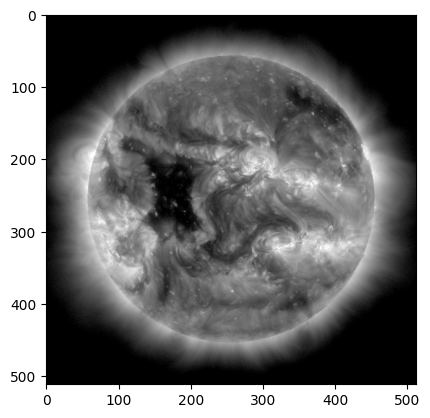

In [189]:
load_image(img_loc_193[1000])

#### 5.1 EDA 질문 4: 이미지 픽셀의 평균 밝기와 표준편차는 시간에 따라 어떻게 변할까? (픽셀의 밝기는 측정 파장의 세기)

In [190]:
# 이미지의 평균 밝기와 표준편차를 구하는 함수

def mean_bright(img_loc):
    img_ = load_img(img_loc, target_size=(512, 512))
    img = img_to_array(img_)[:, :, 0]
    return img.mean()

def std_bright(img_loc):
    img_ = load_img(img_loc, target_size=(512, 512))
    img = img_to_array(img_)[:, :, 0]
    return img.std()

In [191]:
# test
mean_bright(img_loc[1000]), std_bright(img_loc[1000])

(76.11164, 61.147293)

In [192]:
# img_193
mean_193 = [mean_bright(i) for i in img_loc_193]
std_193 = [std_bright(i) for i in img_loc_193]

# img_304
mean_304 = [mean_bright(i) for i in img_loc_304]
std_304 = [std_bright(i) for i in img_loc_304]

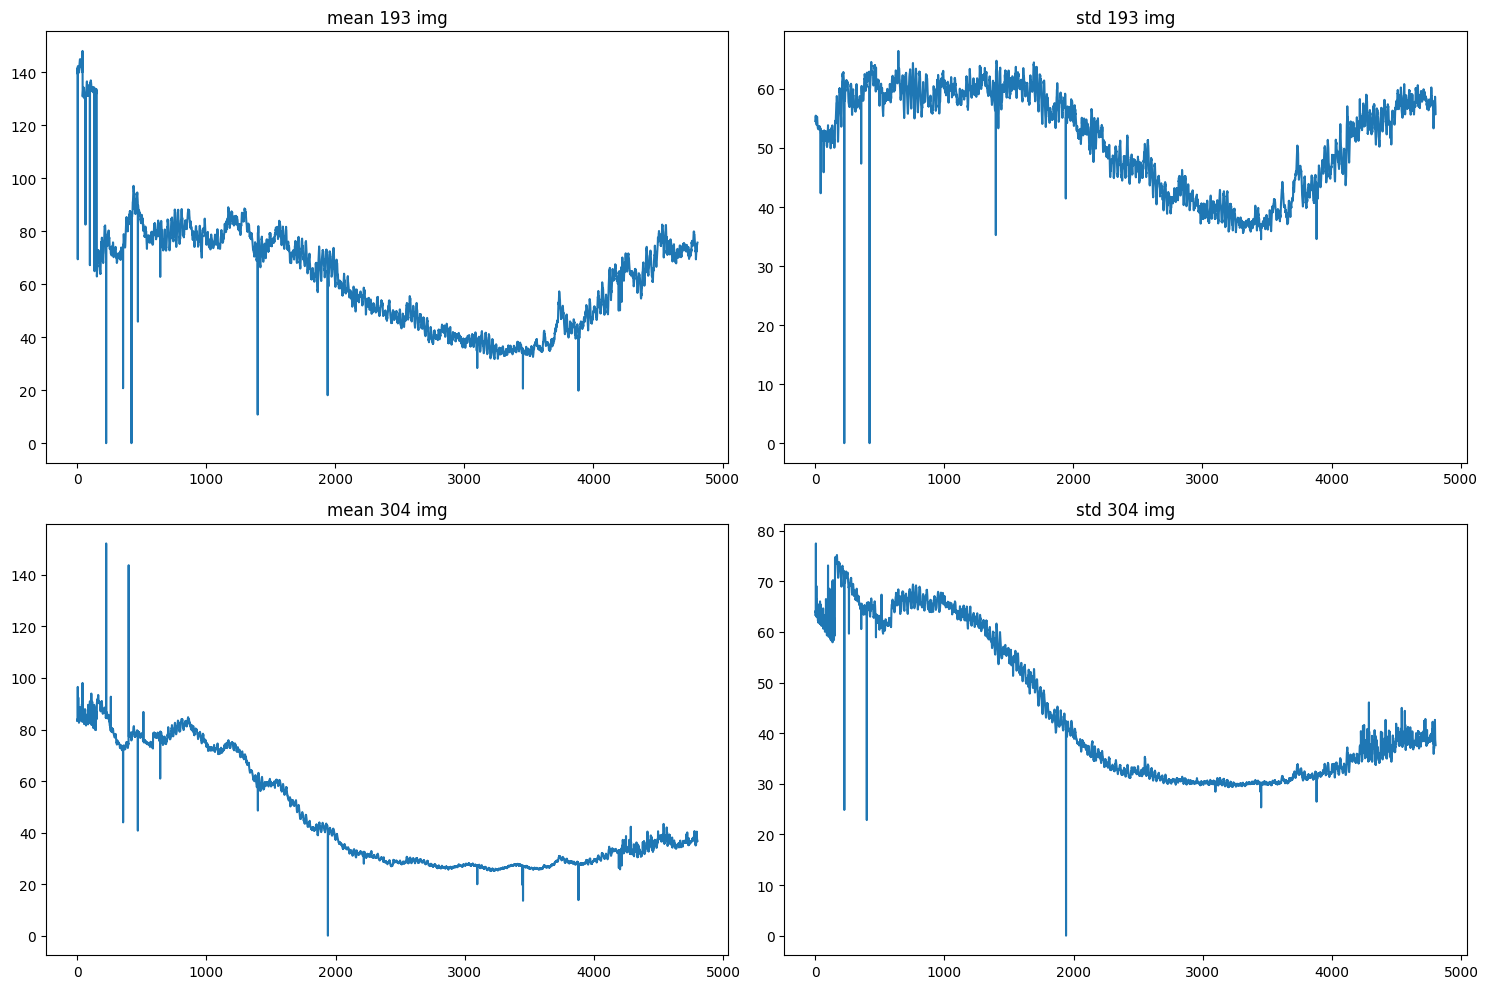

In [204]:
# 각각의 list 시각화
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

axs[0, 0].plot(mean_193)
axs[0, 0].set_title('mean 193 img')

axs[0, 1].plot(std_193)
axs[0, 1].set_title('std 193 img')

axs[1, 0].plot(mean_304)
axs[1, 0].set_title('mean 304 img')

axs[1, 1].plot(std_304)
axs[1, 1].set_title('std 304 img')

plt.tight_layout()
plt.show()


In [228]:
image_infos = pd.DataFrame({'date': date_list, 'img_193_none': img_193_none, 'img_304_none': img_304_none, 'mean_193': None, 'std_193': None, 'mean_304': None, 'std_304': None})

In [229]:
image_infos.head()

,date,img_193_none,img_304_none,mean_193,std_193,mean_304,std_304
0,2010_09_01,1,1,None,None,None,None
1,2010_09_02,1,1,None,None,None,None
2,2010_09_03,1,1,None,None,None,None
3,2010_09_04,1,1,None,None,None,None
4,2010_09_05,1,1,None,None,None,None


In [236]:
image_infos.loc[image_infos['img_193_none'] == 1, 'mean_193'] = mean_193
image_infos.loc[image_infos['img_193_none'] == 1, 'std_193'] = std_193
image_infos.loc[image_infos['img_304_none'] == 1, 'mean_304'] = mean_304
image_infos.loc[image_infos['img_304_none'] == 1, 'std_304'] = std_304

In [240]:
image_infos.drop(['img_193_none', 'img_304_none'], axis=1, inplace=True)

In [241]:
image_infos.head()

,date,mean_193,std_193,mean_304,std_304
0,2010_09_01,139.647415,54.559536,83.486038,63.386421
1,2010_09_02,140.420624,54.866474,83.995483,64.136955
2,2010_09_03,140.671021,55.017952,83.417313,64.110542
3,2010_09_04,140.733826,55.188766,83.367378,64.003357
4,2010_09_05,141.695953,55.476936,83.968887,63.877838


In [252]:
# 결측치와 이상치를 interpolate(선형 보간) 하기 위해 float32형으로 만들어준다.
image_infos = image_infos.astype({'mean_193': 'float32', 'std_193': 'float32', 'mean_304': 'float32', 'std_304': 'float32'})

In [253]:
# interpolate(선형 보간)
image_infos.iloc[:, 1:] = image_infos.iloc[:, 1:].interpolate(method='linear', axis=0)

<AxesSubplot:>

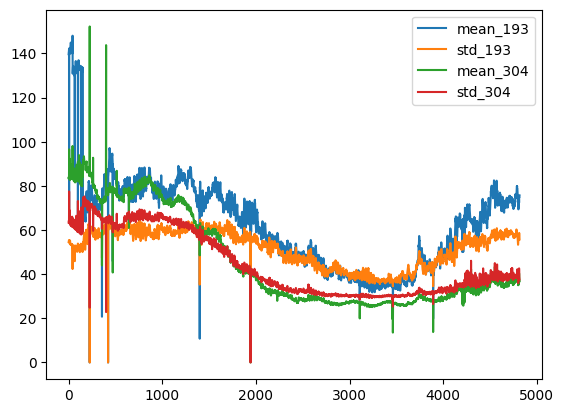

In [254]:
image_infos.plot()

In [209]:
# 이상치를 앞 뒤의 데이터의 평균으로 대체해주는 함수

def interpolate_bright(li):
    li_new = [0 for _ in range(len(li))]
    for i in range(1, len(li)-1):
            li_new[i] = (li[i-1] + li[i+1])/2
        if abs(li[i] - li[i-1]) > 10 and abs(li[i] - li[i+1]) > 10:
            li_new[i] = (li[i-1] + li[i+1])/2
        else: li_new[i] = li[i]
    return li_new

In [255]:
# 이상치를 앞 뒤 데이터의 평균으로 대체한다.
image_infos_new = image_infos.copy()
for i in ['mean_193', 'std_193', 'mean_304', 'std_304']:
    image_infos_new[i] = interpolate_bright(image_infos_new[i])
image_infos_new.head()

,date,mean_193,std_193,mean_304,std_304
0,2010_09_01,0.000000,0.000000,0.000000,0.000000
1,2010_09_02,140.420624,54.866474,83.995483,64.136955
2,2010_09_03,140.671021,55.017952,83.417313,64.110542
3,2010_09_04,140.733826,55.188766,83.367378,64.003357
4,2010_09_05,141.695953,55.476936,83.968887,63.877838


<AxesSubplot:>

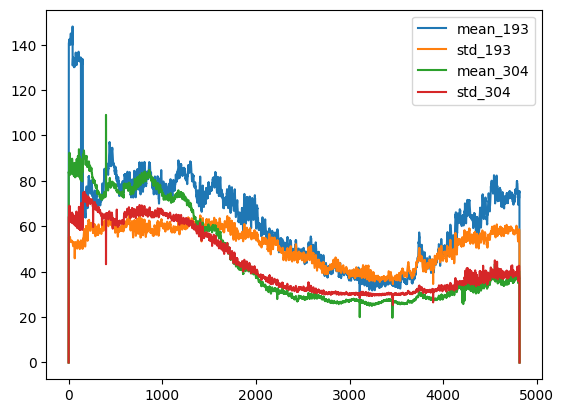

In [257]:
# 전처리한 데이터 시각화
image_infos_new.plot()

In [258]:
# 데이터간의 상관관계 분석
image_infos_new.corr()

,mean_193,std_193,mean_304,std_304
mean_193,1.000000,0.772643,0.813571,0.785916
std_193,0.772643,1.000000,0.726091,0.784439
mean_304,0.813571,0.726091,1.000000,0.987127
std_304,0.785916,0.784439,0.987127,1.000000


<AxesSubplot:>

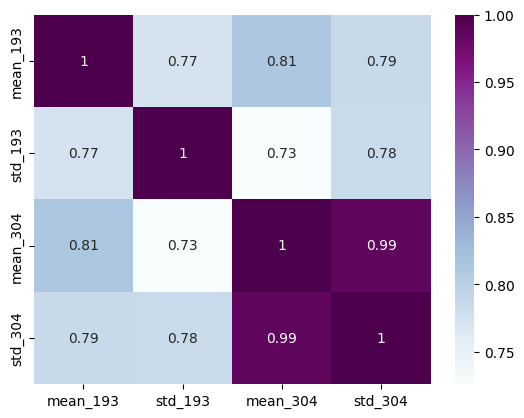

In [269]:
sns.heatmap(image_infos_new.corr(), annot=True, cmap='BuPu')

2011년 9월 1일부터 2023 11월 8일까지 1일 간격으로 촬영된 데이터
각 사진에서 픽셀의 밝기는 그 위치에서 파장의 세기를 나타낸다.
이미지에서 전체 픽셀 밝기의 mean(평균), std(표준편차)를 구해보았다.

관찰 결과

1. 같은 파장 이미지에서, 평균과 표준편차는 상관관계가 크다.
- 193 옴스트롱에서는 0.77, 304 옴스트롱에서는 0.99의 상관관계를 보였다.
2. 다른 파장 이미지에서, 평균끼리와 표준편차끼리는 상관관계가 크다.

관찰 결과 1에서 태양활동이 활발해지면 특정 파장에서 세기가 세질 뿐만 아니라, 태양 이미지 관찰 시 파장의 세기들의 표준편차도 커진다는 것을 알 수 있다. 이 결과로부터 태양활동이 활발해질 때 복사가 강해지지만, 전체적으로 강해지는 것이 아니라 특정 부분들이 특히 더 강해질 것이라 유추할 수 있다.

corr결과와 heatmap을 보면 전체적으로 모두 큰 양의 상관관계를 보임을 알 수 있다. 193옴스트롱과 304옴스트롱 파장에서 시간에 따른 픽셀 밝기 mean과 std변화 양상이 비슷한 것에서 태양활동이 활발해짐에 따라 두 파장 flux가 같이 강해진다는 것을 알 수 있다.

In [291]:
# 시간에 따른 태양의 크기(연간)
# opencv

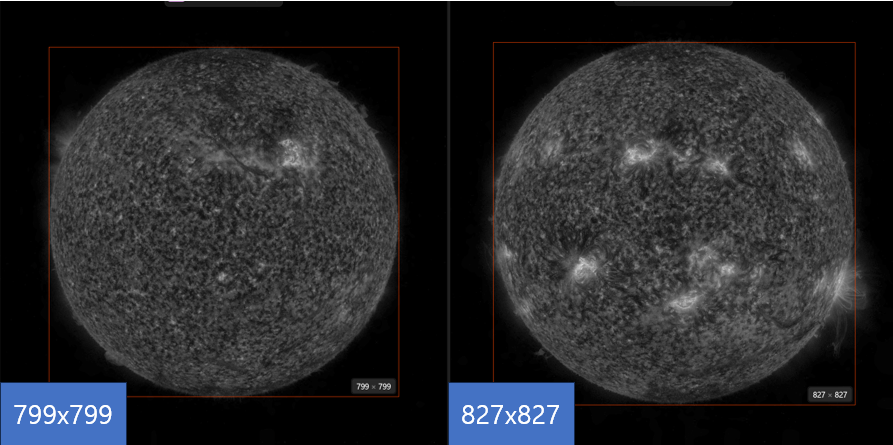

### 총평

태양 활동 지표로 여겨지는 F10.7 flux와 다른 데이터 간의 상관관계를 확인했다. 이를 통해 다른 지표들이 F10.7 flux의 예측에 함께 사용되는 것이 합당함을 알 수 있다. 단기적인 F10.7 flux 값의 분포를 보면 노이즈가 크고 예측하기 어려운 것을 볼 수 있는데, 이를 통해 F10.7 flux의 값이 작은 단위에서는 변하기 쉬운 물리량라는 것을 알 수 있다. 따라서 자기장, 태양풍 등의 다른 데이터들과 함께 학습되면 더 정밀한 단기적 태양활동을 예측할 수 있을 것으로 기대된다.

FFT를 이용한 F10.7 flux의 주기 탐색에서는 태양의 지구에 대한 상대 자전 주기와 가까운 값이 나타나는 것을 볼 수 있었다. 이를 통해 태양이 지구를 보는 면 또한 지구가 받는 태양의 영향에 관여하는 요소임을 알 수 있다.

이미지에서 픽셀들의 mean값과 std값을 시간에 따라 그래프로 그렸을 때, mean값과 std값의 분포가 큰 상관관계를 가짐을 알 수 있었다. 이를 통해 mean값 뿐만 아니라 std값 또한 태양 활동과 큰 상관관계를 가지고, 이를 예측하는 변수로 이용될 수 있음을 알 수 있다. 더 나아가서 태양 활동이 활발해질떄 복사선 파장의 세기가 세지기도 하지만 태양에서 전체적으로 강해지기보다 특정 부분들에서 강해진다는 것을 유추할 수 있다.

이미지에서 태양과의 거리 정보도 얻을 수 있다. 고정된 망원경으로 찍은 사진이므로 규격은 같은데, 하지날과 동지날을 비교했을 때 태양의 크기가 다름을 관찰할 수 있다. 따라서 이미지 데이터를 학습시킨다면 시간에 따라 태양과 지구의 거리가 달라지는 것을 단기적 태양 활동 예측 모델에 반영할 수 있을 것이라 예상된다.